In [1]:
import cv2
import treepoem
import numpy as np
from matplotlib import pyplot as plt

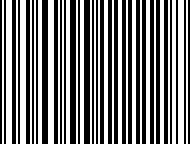

In [91]:
bar = treepoem.generate_barcode('ean13', '100000011111')
bar

In [92]:
bar = np.array(bar)

In [93]:
bar[:10, :10, 0] = 255
bar[:10, :10, 1] = 0
bar[:10, :10, 2] = 0

bar[-10:, -10:, 0] = 0
bar[-10:, -10:, 1] = 0
bar[-10:, -10:, 2] = 255

bar[:10, -10:, 0] = 0
bar[:10, -10:, 1] = 255
bar[:10, -10:, 2] = 0

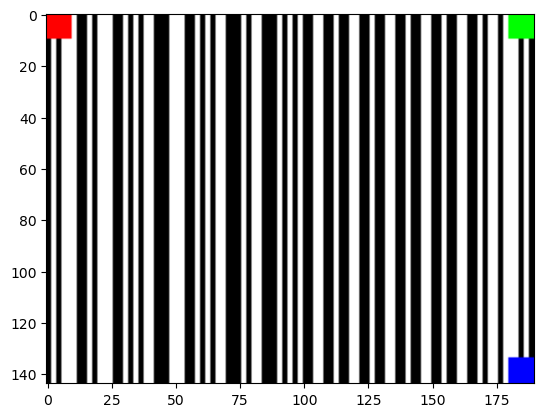

In [94]:
plt.imshow(bar)

In [ ]:
def align_affine_matrix(img, M):
    rows, cols, ch = img.shape
    

[[  0.       199.00743   -0.      ]
 [ 19.900743   0.        -0.      ]]
[[    0.     0.]
 [28657.     0.]
 [    0.  3781.]
 [28657.  3781.]]


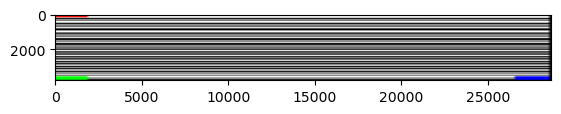

In [171]:
rows, cols, ch = bar.shape
M = np.array([
    [0., 1, 0],
    [0.1, 0., 0]
], dtype=np.float32)
M /= np.linalg.norm(M)*0.005
# M = cv2.getRotationMatrix2D((0, 0), 45, 1)
M[:,-1] = -np.min(M@corners, axis=-1)
new_sz = np.round(np.max(M@corners, axis=-1)).astype(np.int32)
# new_sz = (500, 500)
img = cv2.warpAffine(bar, M, new_sz)
print(M)
print(np.round((M@corners).T))
plt.imshow(img)

In [165]:
np.linalg.norm(M)

0.42426407

In [163]:
np.linalg.norm((corners)[:,:-1]-(corners)[:,1:], axis=0)

array([144.        , 238.40302012, 144.        ])

In [162]:
np.linalg.norm((M@corners)[:,:-1]-(M@corners)[:,1:], axis=0)

array([43.20000172, 71.52090888, 43.20000172])

In [128]:
corners = np.array([[y,x,1] for y in [0, cols] for x in [0, rows]]).T

In [129]:
corners.T

array([[  0,   0,   1],
       [  0, 144,   1],
       [190,   0,   1],
       [190, 144,   1]])

In [112]:
M@[0, 190, 1]

array([134.35028843,  32.52691193])

In [37]:
bar.shape

(144, 190, 3)

In [ ]:
img.shape